# Introduction

It can be more flexible to predict probabilities of an observation belonging to each class in a classification problem rather than predicting classes directly.

In this tutorial, you will discover ROC Curves, Precision-Recall Curves, and when to use each to interpret the prediction of probabilities for binary classification problems.

# Highlights


1. ROC Curves summarize the trade-off between the true positive rate(Recall/Sensitivity) and false positive rate for a predictive model
using different probability thresholds.
2. Precision-Recall curves summarize the trade-off between the true positive rate(Recall/Sensitivity) and the positive predictive value(Precision)
for a predictive model using different probability thresholds.
3. ROC curves are appropriate when the observations are balanced between each class,
whereas precision-recall curves are appropriate for imbalanced datasets.

In [1]:
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

In [2]:
# generate 2 class dataset
X, y = make_classification(n_samples=1000, n_classes=2, random_state=1)

In [3]:
# split into train/test sets
trainX, testX, trainy, testy = train_test_split(X, y, test_size=0.5, random_state=2)

In [4]:
# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(testy))]

In [5]:
# fit a model
model = LogisticRegression(solver='lbfgs')
model.fit(trainX, trainy)

LogisticRegression()

In [6]:
# predict probabilities
lr_probs = model.predict_proba(testX)

In [7]:
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:, 1]

In [8]:
# calculate scores
ns_auc = roc_auc_score(testy, ns_probs)
lr_auc = roc_auc_score(testy, lr_probs)

In [9]:
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.903


In [10]:
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(testy, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(testy, lr_probs)

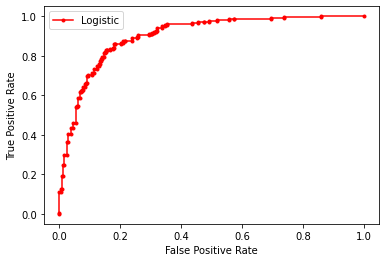

In [11]:
# plot the roc curve for the model
#pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='Logistic',color='r')

# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [13]:
df = pd.read_csv('C:/Users/ADMIN11/Desktop/csv/Social_Network_Ads.csv')
df = df.drop('Gender',axis=1)

In [14]:
df.head()

,User ID,Age,EstimatedSalary,Purchased
0,15624510,19,19000,0
1,15810944,35,20000,0
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,0


In [15]:
x = df.drop('Purchased',axis=1)
y = df['Purchased']

In [16]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3,random_state=9875224)

In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [18]:
from sklearn.svm import SVC
svc = SVC(random_state=24)
svc.fit(x_train,y_train)

y_pred_svm = svc.decision_function(x_test)

In [19]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(x_train,y_train)

y_pred_log = lr.decision_function(x_test)

# Roc Curve and Auc

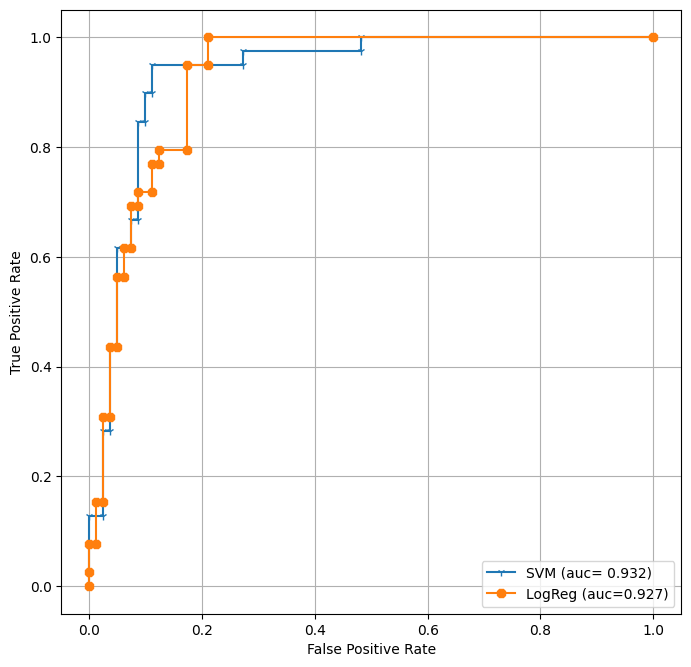

In [33]:
from sklearn.metrics import roc_curve, auc

svm_fpr, svm_tpr, svm_threshold = roc_curve(y_test,y_pred_svm)
auc_svm = auc(svm_fpr,svm_tpr)

log_fpr, log_tpr, log_threshold = roc_curve(y_test,y_pred_log)
auc_log = auc(log_fpr,log_tpr)

plt.figure(figsize=(8,8),dpi=100)
plt.plot(svm_fpr,svm_tpr,marker='1', linestyle='-', label='SVM (auc= %0.3f)' % auc_svm)
plt.plot(log_fpr,log_tpr,marker='8', label='LogReg (auc=%0.3f)' % auc_log)

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.grid()
plt.legend()
plt.show()

In [28]:
#svm_threshold

In [27]:
#log_threshold

In [30]:
from sklearn.metrics import precision_recall_curve

svm_precision , svm_recall, threshold1 = precision_recall_curve(y_test,y_pred_svm)
precision_auc_svm = auc(svm_recall,svm_precision)

log_precision , log_recall , threshold2 = precision_recall_curve(y_test,y_pred_log)
recall_auc_log = auc(log_recall,log_precision)

# Precision Recall Curve and Auc

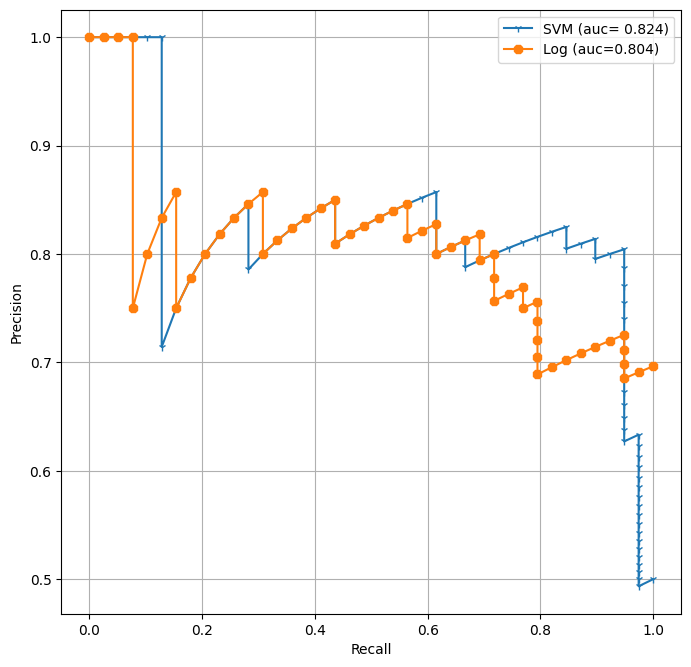

In [32]:
plt.figure(figsize=(8,8),dpi=100)
plt.plot(svm_recall,svm_precision,marker='1', linestyle='-', label='SVM (auc= %0.3f)' % precision_auc_svm)
plt.plot(log_recall,log_precision,marker='8', label='Log (auc=%0.3f)' % recall_auc_log)

plt.xlabel('Recall')
plt.ylabel('Precision')
plt.grid()
plt.legend()
plt.show()

# When to Use ROC vs. Precision-Recall Curves?

Generally, the use of ROC curves and precision-recall curves are as follows:

1. ROC curves should be used when there are roughly equal numbers of observations for each class.

2. Precision-Recall curves should be used when there is a moderate to large class imbalance.

The reason for this recommendation is that ROC curves present an optimistic picture of the model on datasets with a class imbalance.

At times a ROC curve with an imbalanced dataset might be deceptive and lead to incorrect interpretations of the model skill.